<a href="https://colab.research.google.com/github/nilbsongalindo/digital_image_processing/blob/master/PROJETO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pydub
#!pip uninstall -y Pillow
import PIL
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plotagem
from PIL import Image
import cv2
import scipy.io.wavfile
from scipy import fftpack
import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/"My Drive"/'Colab Notebooks'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


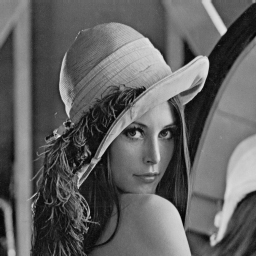

In [0]:
from IPython.display import display
img_recolhida = Image.open("lena.bmp") 
display(img_recolhida)

In [0]:
rate, audioData = scipy.io.wavfile.read("teste1.wav")

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [0]:
from google.colab import files
foto = files.upload()

Saving lena.bmp to lena (2).bmp


# PARTE - 1

    a) Exibir a DCT de s e o valor do nível DC;

    b) Encontrar uma aproximação ? de s obtida preservando os n (parâmetro inteiro no intervalo [0, N-1]) 
    coeficientes AC (da DCT) mais importantes de s e zerando os demais coeficientes AC. Para audição, o 
    sinal resultante deve ser multiplicado por uma constante c tal que (volume de ?) = (volume de s)


In [0]:
def DCT1D(vetor):
  N = len(vetor)
  X = np.zeros(N)
  for k in range(N):
    const = math.sqrt(2.0/(N*1.0))
    CK = math.sqrt(1.0/2.0) if k == 0 else math.sqrt(1.0)
    soma = 0
    for n in range(N):
      f1 = (2.0*(math.pi)*k*n)/(2.0*(N*1.0))
      f2 = (k*(math.pi))/(2.0*(N*1.0))
      aux = vetor[n]
      soma += aux * math.cos(f1+f2)
    X[k] = CK * soma * const
  return X

def IDCT1D(vector):

    N = len(vector)
    x = np.zeros(N)

    for n in range(N):
        sum = 0
        for k in range(N):
            alpha = math.sqrt(1.0/N) if k == 0 else math.sqrt(2.0/N)
            #sum += alpha * vector[k] * math.cos(((2*(3.14159265359)*k*n)/2*N)+((k*(3.14159265359))/2*N))
            sum += alpha * vector[k] * math.cos( (math.pi * (2*n+1) * k) / (2*N) )
        x[n] = sum

    return x

In [0]:
def DCT2D(image):
    
    height = image.shape[0]
    width = image.shape[1]
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)

    for h in range(height):
        imageRow[h] = DCT1D(image[h]) # aplicando DCT na linhas
    for w in range(width):
        imageCol[:, w] = DCT1D(imageRow[:, w]) # aplicando DCT nas colunas

    return imageCol

In [0]:
def Desenha(dado):
  plotagem.figure('Data')
  plotagem.plot(dado, linewidth=0.1, alpha=1,color='red')
  plotagem.ylabel('Amplitude')
  plotagem.show()

In [0]:
def Parte1_A(dado):
  data = DCT1D(dado)
  
  print(data[0]) #nivel DC
  
  return data

1.8371173070873839


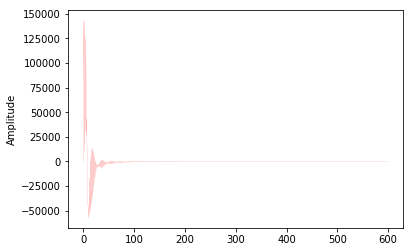

In [0]:
audio_1 = Parte1_A(audioData)
Desenha(audio_1)

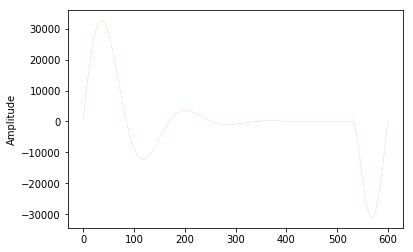

In [0]:
Desenha(audioData)

In [0]:
def Parte1_B(dado):
  #fs, data = wavfile.read(nome_do_arquivo)
  #Desenha(data)
  
  #dado = DCT1D(data)
  n = 12
  
  absolute_ar = np.abs(dado)
  index_ar = np.argsort(absolute_ar, kind = 'heapsort')
  end = len(index_ar)
  
  for i in range(end - n):
    index_ar = np.delete(index_ar, 0, axis=None)
    
  for i in range(len(dado)):
    if(i in index_ar):
      continue
    else:
      dado[i] = 0
  
  Desenha(dado)      
      
  return IDCT1D(dado)
    
  
  

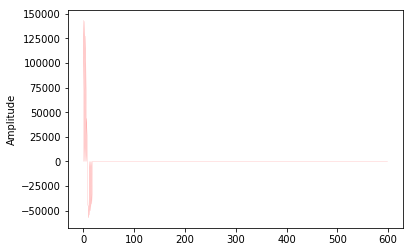

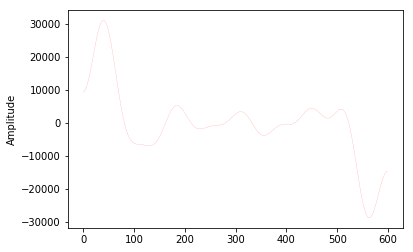

In [0]:
audio_2 = Parte1_B(audio_1)
Desenha(audio_2)

# PARTE - 2

  a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;
    
  
  b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais 
    importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

In [0]:
def Parte2_A(dado):
  data = DCT2D(dado)
  print(data[0][0])
  
  return data

25261.128906250007


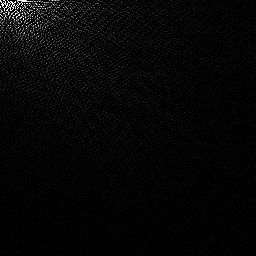

In [0]:
image = np.array(img_recolhida)
imagem1 = Parte2_A(image)
result = Image.fromarray((np.clip(imagem1, 0, 255)).astype(np.uint8))
display(result)


In [0]:
def Parte2_B(image):
  
  image1 = np.reshape(image,(image.shape[0]*image.shape[1]),1)
  
  nivel_dc = image1[0]
  nivel_ac = image1[1:]
  
  n = 3
  
  maxIndex = np.argsort(abs(nivel_ac), kind = 'heapsort')
  maior = np.full((image.shape[0]*image.shape[1])-1, 0)  
  
  for i in maxIndex[maxIndex.size-n:maxIndex.size]:
    maior[i]=1  
    
  Ac_nprimeiros = nivel_ac * maior 
    
  aux_teste = np.full(image.shape[0]*image.shape[1], 0)  
  aux_teste[0] = nivel_dc
  aux_teste[1:] = Ac_nprimeiros 
  
  #voltar para o tipo matriz
  Toda_foto = np.reshape(aux_teste,(image.shape[0],image.shape[1]))
  aux = np.reshape(Toda_foto,(image.shape[0]*image.shape[1]),1)
  Toda_foto = np.reshape(aux,(image.shape[0],image.shape[1]))
  #volta para a foto
  imagem_exibir = Image.fromarray((np.clip(Toda_foto, 0, 255)).astype(np.uint8))
  display(imagem_exibir)
  img = np.array(np.int32(img_recolhida))
  
  c = np.full((img.shape[0], img.shape[1]), 0)
  
  for i in range(image.shape[0]):
    c[i] = IDCT1D(Toda_foto[i])
    
  a = np.full((img.shape[0], img.shape[1]), 0)

  for i in range(img.shape[1]):
    a[:,i] = IDCT1D(c[:,i])
  
  return a
  
 

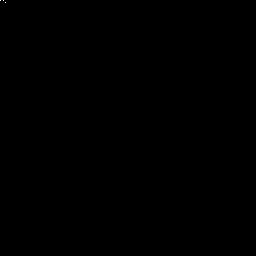

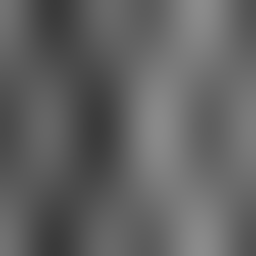

In [0]:
imagem_2_b = Parte2_B(imagem1)
result1 = Image.fromarray((np.clip(imagem_2_b, 0, 255)).astype(np.uint8))
display(result1)

# PARTE - 3

  Desenvolva um compactador/expansor de frequências para sinais de áudio, em que Xt[round(k*c)] = X[k], 
c real, c > 0. A dimensão do vetor Xt deve ser igual à do vetor X.

In [0]:
def Parte3(dado, c):
  data = DCT1D(dado)
  N = dado.size
  size = N
  if c*N > N:
    size = c*N
  
  Xnew = np.full(round(size), 0)
  
  for i in range(N):
    Xnew[round(c*i)] = data[i]


  Xnew = Xnew[0:N]
  
  return IDCT1D(Xnew)
  
  

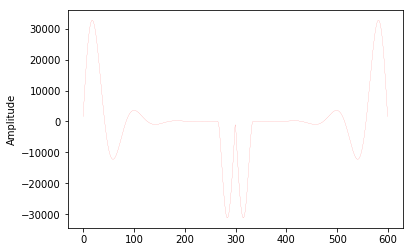

In [0]:
audio_compact = Parte3(audioData, 2)
Desenha(audio_compact)

# TESTES


2183.6442487570853


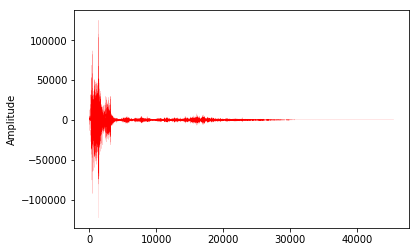

In [0]:
DCT = fftpack.dct(audioData, norm = 'ortho')
print(DCT[0])
Desenha(DCT)

scipy.io.wavfile.write("DCTaudio", rate, np.int16(DCT))

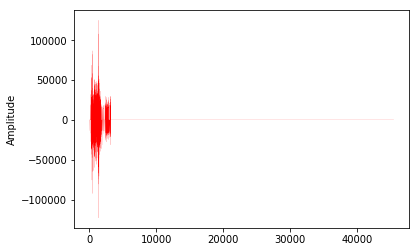

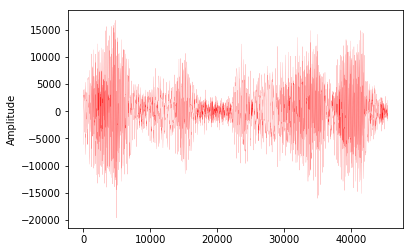

In [0]:
n = 1000
  
absolute_ar = np.abs(DCT)
index_ar = np.argsort(absolute_ar, kind = 'heapsort')
end = len(index_ar)
  
for i in range(end - n):
  index_ar = np.delete(index_ar, 0, axis=None)
    
for i in range(len(DCT)):
  if(i in index_ar):
    continue
  else:
    DCT[i] = 0
  
Desenha(DCT)   

idct = fftpack.idct(DCT, norm = 'ortho')
      
Desenha(idct)

scipy.io.wavfile.write("IDCTaudio", rate, np.int16(idct))

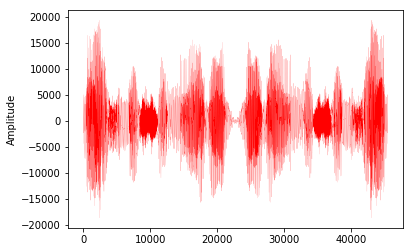

In [0]:
DCT = fftpack.dct(audioData, norm = 'ortho')
data = DCT
c = 2
N = audioData.size
size = N
if c*N > N:
  size = c*N
  
Xnew = np.full(round(size), 0)
  
for i in range(N):
  Xnew[round(c*i)] = data[i]


Xnew = Xnew[0:N]

Xteste = fftpack.idct(Xnew, norm = 'ortho')

Desenha(Xteste)

scipy.io.wavfile.write("audio_parte3", rate, np.int16(Xteste))